In [4]:
import pandas as pd

# Load dataset (make sure the path is correct)
df = pd.read_csv('/Users/diyapatel/Desktop/ITCS-3162/Project 1 /WeatherEvents_Jan2016-Dec2022.csv')

# Convert datetime
df['StartTime(UTC)'] = pd.to_datetime(df['StartTime(UTC)'])
df['EndTime(UTC)'] = pd.to_datetime(df['EndTime(UTC)'])

# Create new features
df['Duration'] = (df['EndTime(UTC)'] - df['StartTime(UTC)']).dt.total_seconds() / 3600
df['Month'] = df['StartTime(UTC)'].dt.month

# Quick preview
print(df.shape)
df.head()



(8627181, 16)


,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode,Duration,Month
0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,1.333333,1
1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,0.666667,1
2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,0.03,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,9.666667,1
3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,0.333333,1
4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,2.000000,1


In [5]:
# Basic cleaning just for plotting
df_plot = df.copy()

df_plot = df_plot.dropna(subset=['Type', 'Severity', 'StartTime(UTC)', 'EndTime(UTC)'])
df_plot = df_plot[(df_plot['Duration'] >= 0) & (df_plot['Duration'] <= 200)]

month_names = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df_plot['MonthName'] = df_plot['Month'].map(month_names)


Bar Chart - most common weather event types

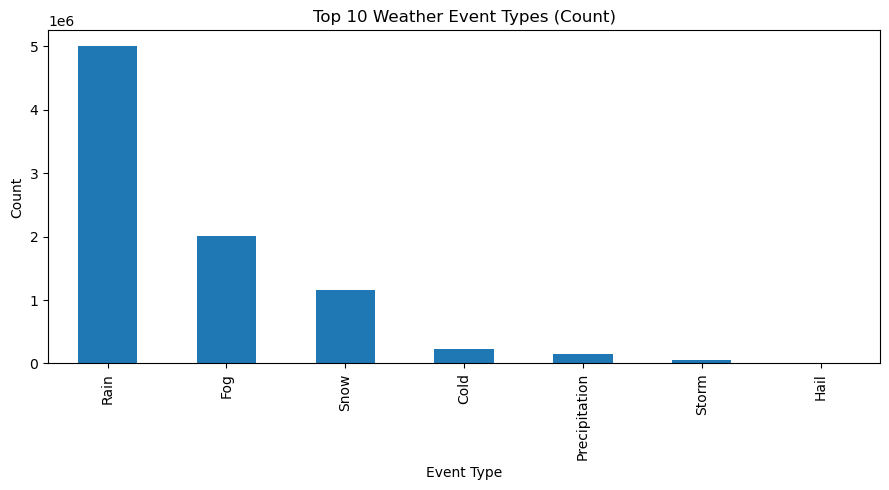

Type
Rain             5000662
Fog              2014154
Snow             1158555
Cold              231392
Precipitation     157159
Storm              61309
Hail                2927
Name: count, dtype: int64

In [6]:
type_counts = (
    df_plot['Type']
    .value_counts()
    .sort_values(ascending=False)
)

plt.figure(figsize=(9,5))
type_counts.head(10).plot(kind='bar')
plt.title('Top 10 Weather Event Types (Count)')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('chart_event_types.png', dpi=200)
plt.show()

type_counts.head(10)


Line Chart - monthly trend of events (all years combined)

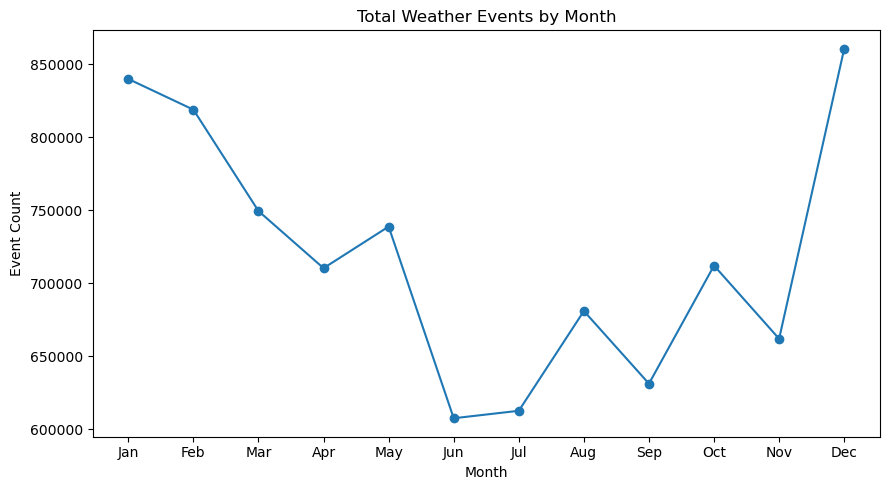

,Count
Month,
1,840041
2,819014
3,749595
4,710478
5,738950
6,607697
7,612806
8,681138
9,631385


In [7]:
events_by_month = (
    df_plot.groupby('Month', as_index=True)
           .size()
           .reindex(range(1,13))             # ensure Jan–Dec order
           .rename('Count')
)

plt.figure(figsize=(9,5))
plt.plot(events_by_month.index, events_by_month.values, marker='o')
plt.xticks(range(1,13), [month_names[m] for m in range(1,13)])
plt.title('Total Weather Events by Month')
plt.xlabel('Month')
plt.ylabel('Event Count')
plt.tight_layout()
plt.savefig('chart_events_by_month.png', dpi=200)
plt.show()

events_by_month.to_frame()


Boxplot - duration by severity

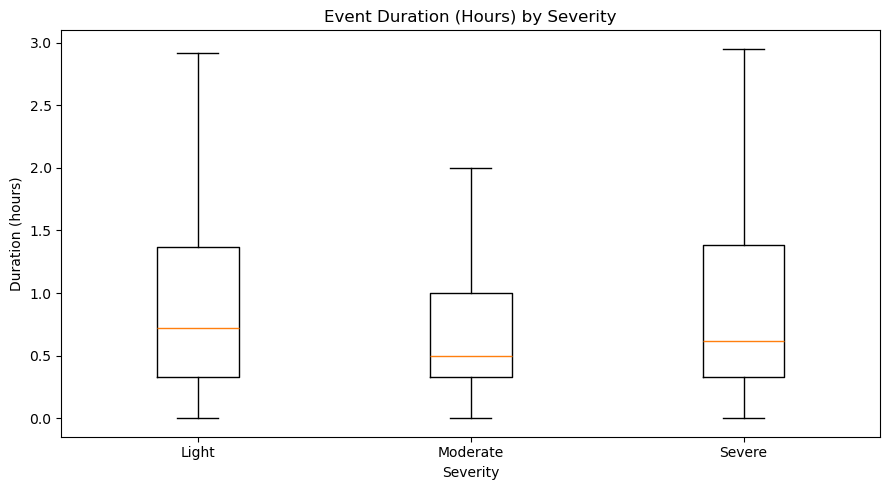

In [8]:
# Keep a consistent severity order if present
severity_order = ['Light', 'Moderate', 'Severe', 'Unknown']
available = [s for s in severity_order if s in df_plot['Severity'].unique()]
plot_df = df_plot[df_plot['Severity'].isin(available)]

# Prepare data for matplotlib boxplot
data = [plot_df.loc[plot_df['Severity']==s, 'Duration'] for s in available]

plt.figure(figsize=(9,5))
plt.boxplot(data, labels=available, showfliers=False)
plt.title('Event Duration (Hours) by Severity')
plt.xlabel('Severity')
plt.ylabel('Duration (hours)')
plt.tight_layout()
plt.savefig('chart_duration_by_severity.png', dpi=200)
plt.show()
